## Clustering Geospatial Data

K-Means Clustering done with smart convergence for faster processing and run multiple times to get the best result. Quite a few parameters to play around with and also with visualizing part.
Agglomerative Clustering is type of Hierarchical clustering (bottom up approach, grouping) which is popular than Divisive Clustering. Using distance matrix can derive dendrogram of the data, Criterion for calculating distance matrix can be changed and tested (single, average, complete and centroid linkage).
Density Based Spatial Clustering with Noise defines cluster as maximal set of density connected points. Functional program to test different parameters and datasets with the program and how long it takes to perform the operation.

## K-Means Clustering:

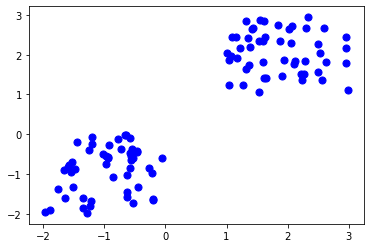

Centroids 
 [[ 1.85476233  2.05581847]
 [-0.95642326 -0.90531419]]


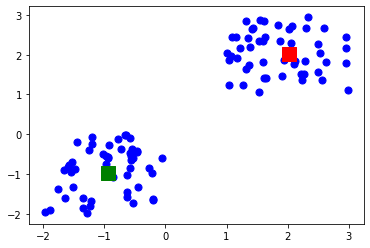

Class Labels 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([1])

In [20]:
# K-Means Clustering------------------------------------1--------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

print("Centroids \n",Kmean.cluster_centers_)

plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker= 's')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

# Prediction
print("Class Labels \n",Kmean.labels_)
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)


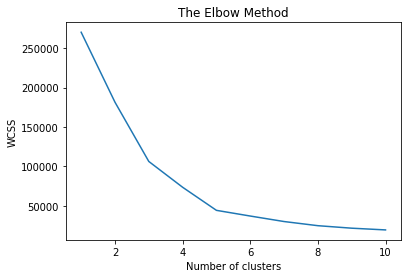

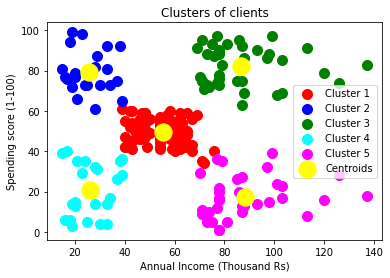

In [1]:
# K-Means Clustering------------------------------------2--------------------------------
import warnings 
warnings.filterwarnings("ignore")
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the mall dataset with pandas

dataset = pd.read_csv('C:/Users/Admin/Documents/MLClass/Datasets/Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values


# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (Thousand Rs)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

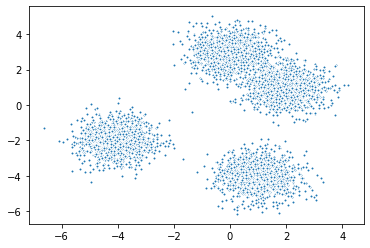

[2 1 1 ... 3 2 2]
[[-0.04157611  2.99111654]
 [ 1.00183151 -4.01471746]
 [-4.01960518 -1.99567925]
 [ 1.97950511  0.99571115]]


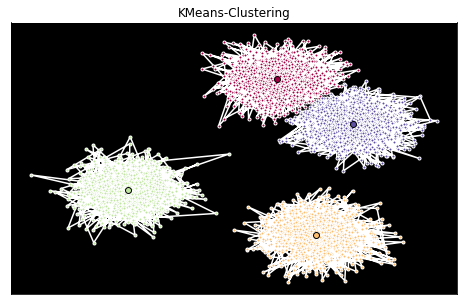

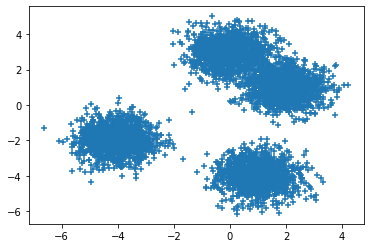

In [3]:
# K-Means Clustering------------------------------------3--------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Create a random seed and set it to 0
np.random.seed(0)

# Make random clusters using blobs
X, y = make_blobs(n_samples=5000, centers=[[2, 1], [-4, -2], [1, -4], [0, 3]], cluster_std=0.7)

# Scatter plot the data to check
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='white')
plt.show()

""" 
Set K-Means Clustering, 
n_clusters is number of clusters to form, 
k-means++ for smart way to converge faster
n_init initializes different centroids each run and best output is shown in terms of inertia
"""

k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

# Fit KMeans model with feature matrix, X
k_means.fit(X)

# Grab the labels for each point in the model
k_means_labels = k_means.labels_
print(k_means_labels)

# Get the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

# Visualize the Plot
# Initialize plot with the specified dimensions.
fig = plt.figure(figsize=(8, 5))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are.
colors = plt.get_cmap('Spectral')(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background for better visibility
ax = fig.add_subplot(1, 1, 1, facecolor='black')

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each data point is in.
for k, col in zip(range(len([[2, 1], [-4, -2], [1, -4], [0, 3]])), colors):
    # Create a list of all data points, where the data points that are in the cluster are labeled as true
    # Else they are labeled as false.
    members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the data points with color col.
    ax.plot(X[members, 0],
            X[members, 1],
            'w',
            markerfacecolor=col,
            marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor=col,
            markeredgecolor='k',
            markersize=6)

# Title of the plot
ax.set_title('KMeans-Clustering')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# Display the scatter plot from above for comparison.
plt.scatter(X[:, 0], X[:, 1], marker='+')

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = ["the young french men crowned world champions",
             "Google Translate app is getting more intelligent everyday",
             "Facebook face recognition is driving me crazy",
             "who is going to win the Golden Ball title this year",
             "these camera apps are funny",
             "Croacian team made a brilliant world cup campaign reaching the final match",
             "Google Chrome extensions are useful.",
             "Social Media apps leveraging AI incredibly",
             "Qatar 2022 FIFA world cup is played in winter"]
 
 
vectorizer = TfidfVectorizer(stop_words = 'english')
data = vectorizer.fit_transform(documents)
 
true_k = 2
clustering_model = KMeans(n_clusters = true_k, 
                          init = 'k-means++',
                          max_iter = 300, n_init = 10)
clustering_model.fit(data)

## terms per cluster

sorted_centroids = clustering_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in sorted_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()
        print()
 
print()


# Cluster 0: apps google funny camera extensions useful chrome driving face facebook
#
# Cluster 1: world cup young champions crowned french men qatar fifa played

## predicting the cluster of new docs

new_doc = ["how to install Chrome"]
Y = vectorizer.transform(new_doc)
prediction = clustering_model.predict(Y)
print(prediction)
# [0]

new_doc = ["UCL Final match is played in Madrid this year"]
Y = vectorizer.transform(new_doc)
prediction = clustering_model.predict(Y)
print(prediction)

Cluster 0: apps google funny camera extensions useful chrome driving face facebook

Cluster 1: world cup young champions crowned french men qatar fifa played


[0]
[1]


## Hierarchical Clustering:

In [ ]:
import sys
!{sys.executable} -m pip install scipy

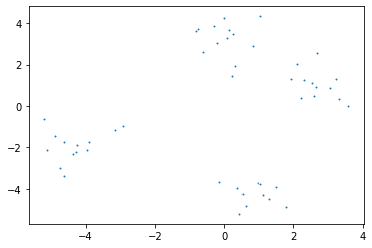

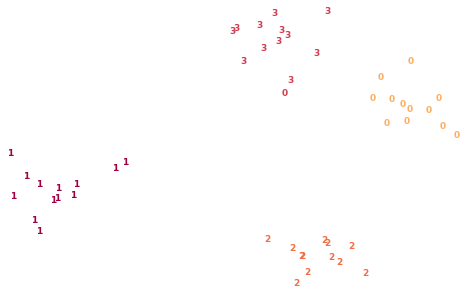

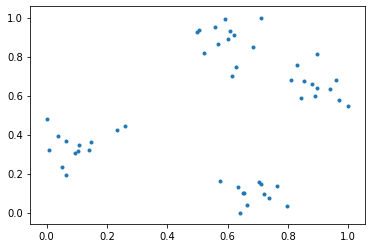

X is: 
 [[0.60799834 0.93251809]
 [0.25814397 0.44433328]
 [0.59223619 0.99192356]
 [0.65165947 0.10033124]
 [0.66454299 0.04005605]]

 Y is: 
 [3 1 3 2 2]
Distance Matrix: 
 [[0.60060178 0.061461   0.83333141 ... 0.38485422 0.91595448 0.84268193]
 [0.         0.6414614  0.52267758 ... 0.65796905 0.67529731 0.57726137]
 [0.6414614  0.         0.89357036 ... 0.43912851 0.97733592 0.90368309]
 ...
 [0.65796905 0.43912851 0.60437858 ... 0.         0.62952454 0.5851844 ]
 [0.67529731 0.97733592 0.15805088 ... 0.62952454 0.         0.09806926]
 [0.57726137 0.90368309 0.06780469 ... 0.5851844  0.09806926 0.        ]]


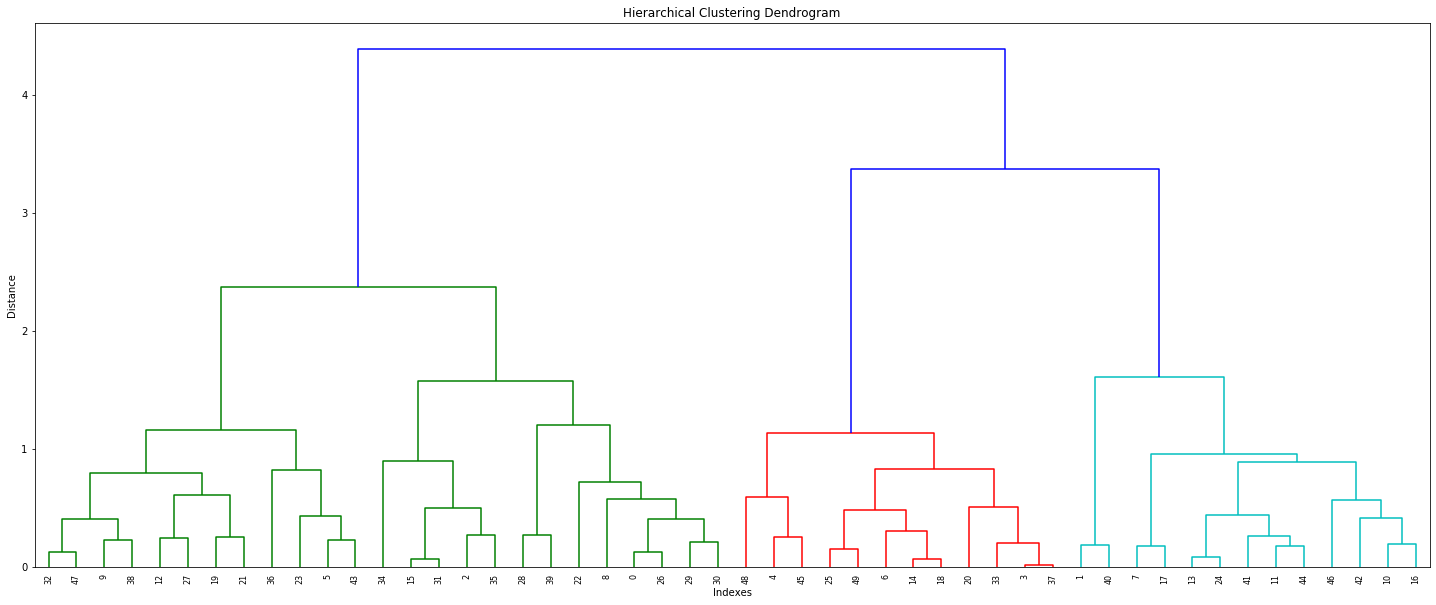

In [5]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.spatial import distance_matrix

# Create a random seed and set it to 0
np.random.seed(0)

# Make random clusters using blobs
X, y = make_blobs(n_samples=50, centers=[[2, 1], [-4, -2], [1, -4], [0, 3]], cluster_std=0.7)

# Scatter plot the data to check
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='white')
plt.show()

""" Agglomerative Clustering-
n_clusters is number of clusters to form and number of centroids to generate
linkage sets which distance to use between sets of observations
"""
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

# Fit the model with X and y from generated data
agglom.fit(X, y)

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(8, 5))

# Scale the data points down or else the data points will be scattered very far apart.
# Create a minimum and maximum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X.
X = (X - x_min) / (x_max - x_min)
# Display all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.get_cmap('Spectral')(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Display the plot
plt.show()
# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()


# Dendrogram Associated for the Agglomerative Hierarchical Clustering
# Distance Matrix or Proximity Matrix of points
print("X is: \n",X[:5])
print('\n Y is: \n', y[:5])

dist_matrix = distance_matrix(X[0:], X[1:])
print('Distance Matrix: \n', dist_matrix)

# Choose any linkage criterion
Z = hierarchy.linkage(dist_matrix, 'complete')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Indexes')
plt.ylabel('Distance')

dendrogram = hierarchy.dendrogram(Z,
                                  leaf_rotation=90.,
                                  leaf_font_size=8
                                  )
plt.show()

## DBSCAN Clustering

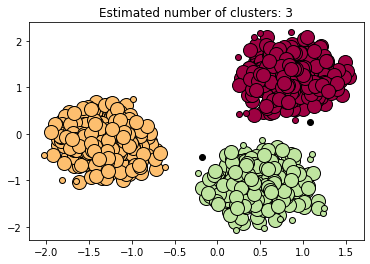

In [8]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create random data and store in feature matrix X and response vector y
X, y = make_blobs(n_samples=1500, centers=[[2, 1], [-4, -2], [1, -4]], cluster_std=0.7)

# Standardize features by removing the mean and scaling to unit variance
X = StandardScaler().fit_transform(X)


""" 
Define function to change parameters and make it simple- 
    - epsilon is a float that describes the maximum distance between two samples for them to be considered as in same 
      neighbourhood.
    - minimum_samples is number of samples in a neighbourhood for a point to be considered as a core point.
    - data is our dataset
"""


def display(epsilon, minimum_samples, data):

    # Initialize DBSCAN with specified epsilon and min. samples. Fit the model with feature matrix X
    db = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit(data)

    # Create an array of booleans using the labels from db
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

    # Replace all elements with 'True' in core_samples_mask that are in cluster, 'False' if points are outliers
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black color is removed and used for noise instead.
    # Remove repetition in labels by turning it into a set.
    unique_labels = set(labels)

    # Create colors for the clusters.
    colors = plt.get_cmap('Spectral')(np.linspace(0, 1, len(unique_labels)))

    # Plot the points with colors
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        # Plot the data points that are clustered
        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0],
                 xy[:, 1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k',
                 markersize=14)

        # Plot the outliers
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0],
                 xy[:, 1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k',
                 markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()


# Function object
display(0.25, 6, X)

